# Problem Statement
The task is to predict house prices based on various features such as the number of bedrooms, bathrooms, square footage, location, and other relevant attributes. The goal is to train a machine learning model that can accurately estimate house prices and assist in property valuation.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,recall_score,f1_score,roc_auc_score,precision_score,confusion_matrix,classification_report
from sklearn import preprocessing

In [2]:
train=pd.read_csv('BHP.csv')
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


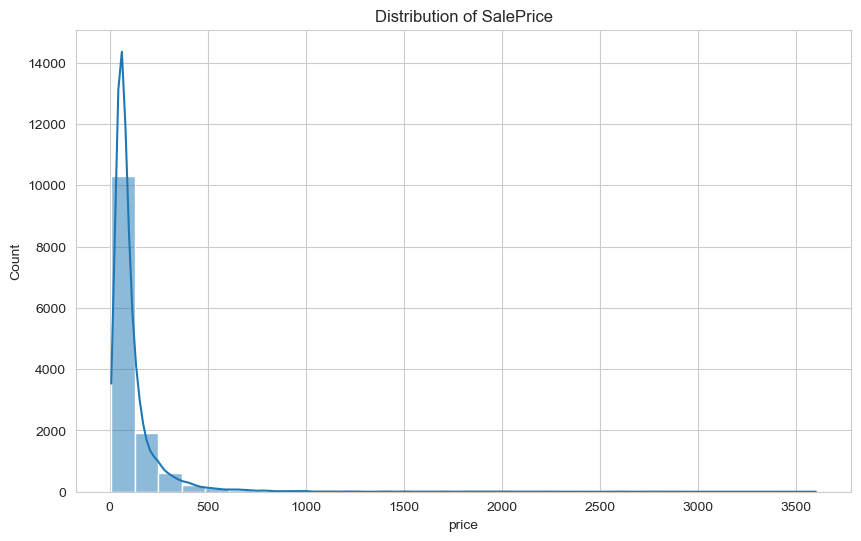

In [3]:
import seaborn as sns
sns.set_style('whitegrid')
# Visualize the distribution of 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train['price'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()

In [4]:
train.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
train.shape

(13320, 9)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# EDA

C:\Users\yukti\AppData\Local\Temp\ipykernel_20188\2000136203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'],color='red',bins= 50, hist_kws={'alpha': .4})


<Axes: xlabel='price', ylabel='Density'>

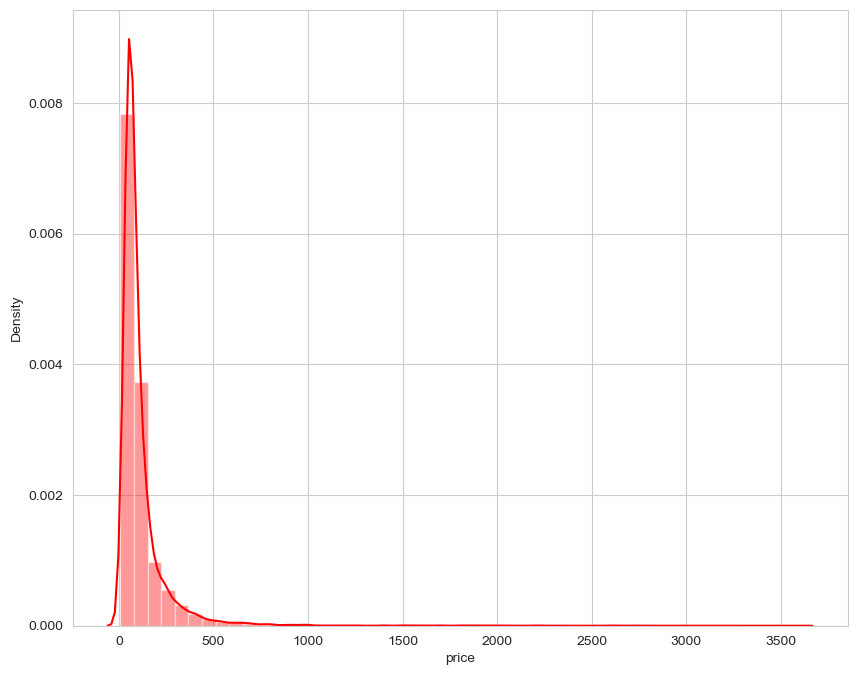

In [7]:
plt.figure(figsize=(10,8))
sns.distplot(train['price'],color='red',bins= 50, hist_kws={'alpha': .4})

C:\Users\yukti\AppData\Local\Temp\ipykernel_20188\416658409.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

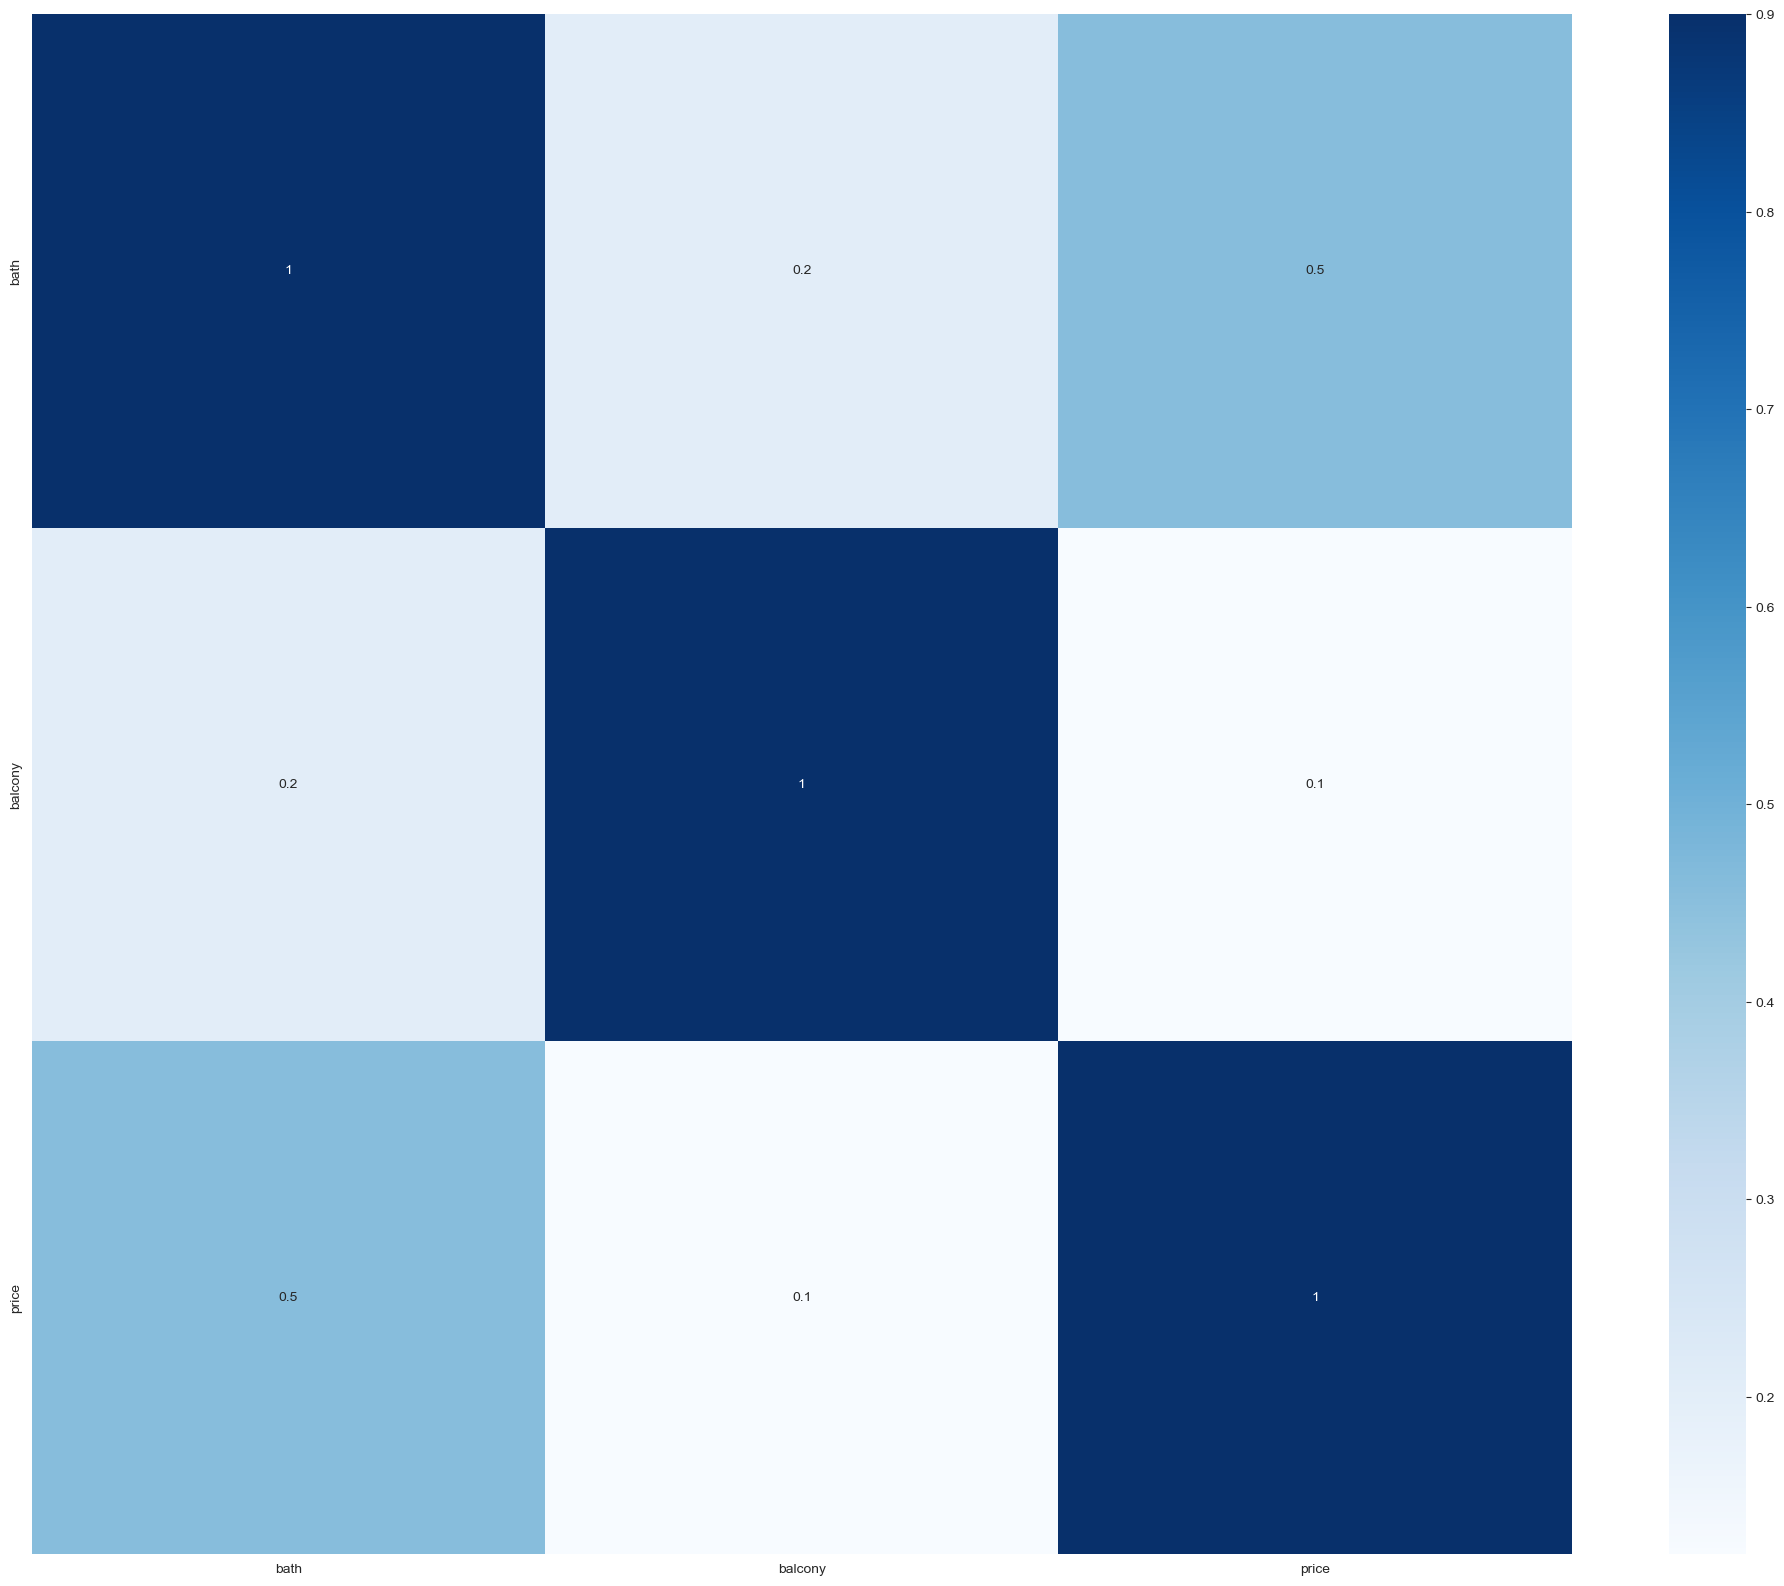

In [8]:
corr = train.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr, vmax=0.9, cmap="Blues",fmt = '.1g', annot=True, square=True)

In [9]:
def clean_data(df):
    cols = list(df.columns)
    null_list = list(df.isna().sum())
    null_list = [x/1460 for x in null_list]
    for i in range(len(null_list)):
        if null_list[i]>=0.75:
            df.drop(cols[i],axis = 1,inplace = True)

In [10]:
clean_data(train)

In [11]:
train.shape

(13320, 8)

In [12]:
print(list(train.columns))

['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 'price']


In [13]:
def remove_null(df):
    num_col = []
    cat_col = []
    for i in df.columns:
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            num_col.append(i)
        else:
            cat_col.append(i)
    for i in num_col:
        df[i].fillna(df[i].median(),inplace =True)

    df.fillna("NoResult",inplace=True)

In [14]:
remove_null(train)

In [15]:
print(list(train.isna().sum()),end=' ')

[0, 0, 0, 0, 0, 0, 0, 0] 

In [16]:
cat_col = [x for x in train.columns if train[x].dtypes == 'object' ]
len(cat_col)

5

Mean of Price: 113.0
Median of Price: 72.0
Mode of Price: 75.0


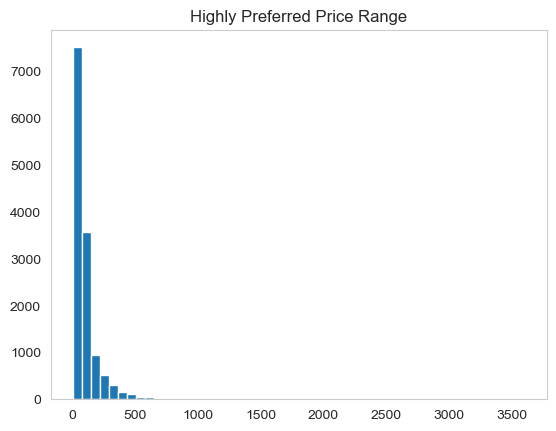

In [17]:
print("Mean of Price:", round(train["price"].mean(numeric_only=True), 0))
print("Median of Price:", train["price"].median(numeric_only=True))
print("Mode of Price:", train["price"].mode()[0])

train["price"].hist(bins=50, grid=False)
plt.title("Highly Preferred Price Range");

In [18]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for col in cat_col:
    train[col]= label_encoder.fit_transform(train[col])

In [19]:
train.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,3,40,419,13,70,2.0,1.0,39.07
1,2,80,317,19,1288,5.0,3.0,120.00
2,0,80,1180,16,514,2.0,3.0,62.00
3,3,80,757,16,602,3.0,1.0,95.00
4,3,80,716,13,239,2.0,1.0,51.00


In [20]:
train.shape

(13320, 8)

In [21]:
x = train.drop("price",axis=1)
y = train['price']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,shuffle = True,random_state = 42)

In [23]:
x_train

,area_type,availability,location,size,total_sqft,bath,balcony
7172,3,80,522,16,1191,4.0,2.0
9150,3,68,1262,0,1862,1.0,1.0
5153,1,80,1209,13,158,2.0,1.0
11894,2,80,1039,17,577,5.0,2.0
5727,3,80,664,16,574,3.0,2.0
...,...,...,...,...,...,...,...
11964,2,80,1189,22,239,4.0,1.0
5191,3,69,707,16,642,3.0,2.0
5390,3,80,443,13,74,2.0,1.0
860,2,80,973,24,239,4.0,2.0


In [24]:
y_train

7172     175.00
9150      36.23
5153      52.00
11894     95.00
5727      95.00
          ...  
11964     99.00
5191     120.00
5390      48.50
860      125.00
7270      90.00
Name: price, Length: 11322, dtype: float64

In [25]:
x_test

,area_type,availability,location,size,total_sqft,bath,balcony
8077,0,80,212,14,62,2.0,1.0
1602,3,80,987,16,779,3.0,1.0
10498,0,80,513,13,119,2.0,1.0
3297,2,80,832,24,239,4.0,2.0
8893,0,26,336,19,1224,3.0,1.0
...,...,...,...,...,...,...,...
4832,3,80,799,0,1930,1.0,1.0
1606,0,80,356,16,686,3.0,0.0
10410,2,80,1268,22,789,5.0,2.0
8744,2,80,486,19,1208,4.0,1.0


In [26]:
y_test

8077      64.8
1602     125.0
10498     60.0
3297     110.0
8893     210.0
         ...  
4832      55.0
1606      80.0
10410    300.0
8744     650.0
12064     45.0
Name: price, Length: 1998, dtype: float64

In [27]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'SVR':SVR()
}

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    ytrainpred = model.predict(x_train)
    ytestpred = model.predict(x_test)
    model_train_r2_score= r2_score(y_train,ytrainpred)
    ## Test performances
#     model_test_accuracy = accuracy_score(y_test,ytestpred)
#     model_test_f1 = f1_score(y_test,ytestpred)
#     model_test_precision=precision_score(y_test,ytestpred)
#     model_test_recall = recall_score(y_train,ytrainpred)
#     model_test_roauc_score= roc_auc_score(y_test,ytestpred)
    model_test_r2_score= r2_score(y_test,ytestpred)

    print(list(models.keys())[i])
    print(model_train_r2_score)
    print(model_test_r2_score)
    print()
    print("----------------------------------------------------------")

LinearRegression
0.23442418806333432
0.25444485192927346

----------------------------------------------------------
Lasso
0.23430478573102576
0.2567443633057078

----------------------------------------------------------
DecisionTreeRegressor
0.9994701738521251
-0.02497319009772081

----------------------------------------------------------
RandomForestRegressor
0.9258883931727792
0.5054924131135932

----------------------------------------------------------
